# The Attention mechanism

### We will be coding 4 types of following attentions

![alt text](image.png)

### A simple self-attention mechanism without trainable weights


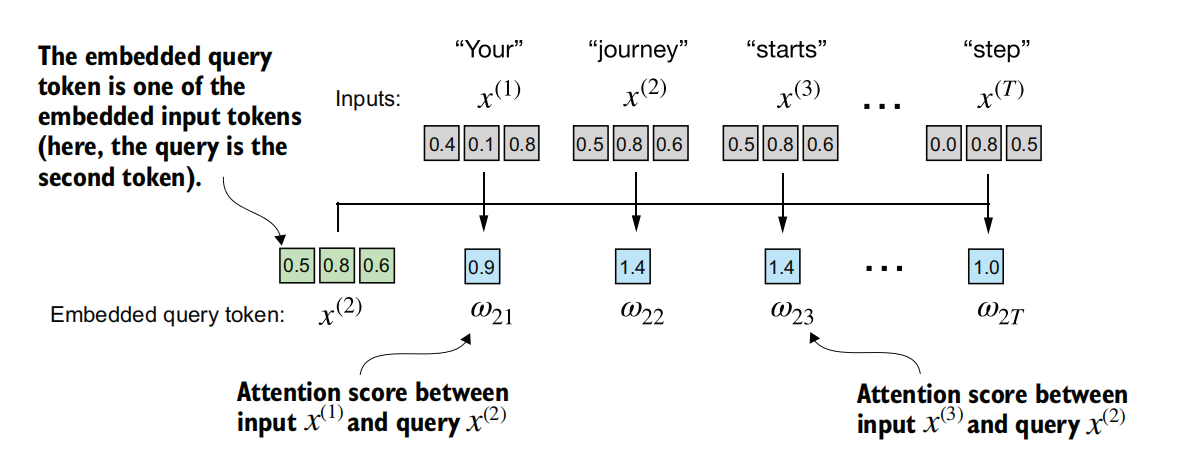

In [2]:
import torch
inputs = torch.tensor(
 [[0.43, 0.15, 0.89], # Your (x^1)
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]] # step (x^6)
)

attn. score(w_1) = x_1 @ x_2

In [3]:
query = inputs[1] 
# example for attn_score_2
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
 attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


Now we will normalize the attn. scores ( w_i )

In [4]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


We can also use Softmax here for normalization, it is more favarable during training

In [5]:
def softmax_naive(x):
 return torch.exp(x) / torch.exp(x).sum(dim=0)
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [6]:
# pytorch implimentation of softmax
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


![alt text](image-2.png)

In [7]:
query = inputs[1] 
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
 context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


For all the vectors

In [8]:
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
 for j, x_j in enumerate(inputs):
    attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


We can obtain the same result using a dot product as:

In [9]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [10]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [11]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [12]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [13]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


## Implementing self-attention with trainable weights
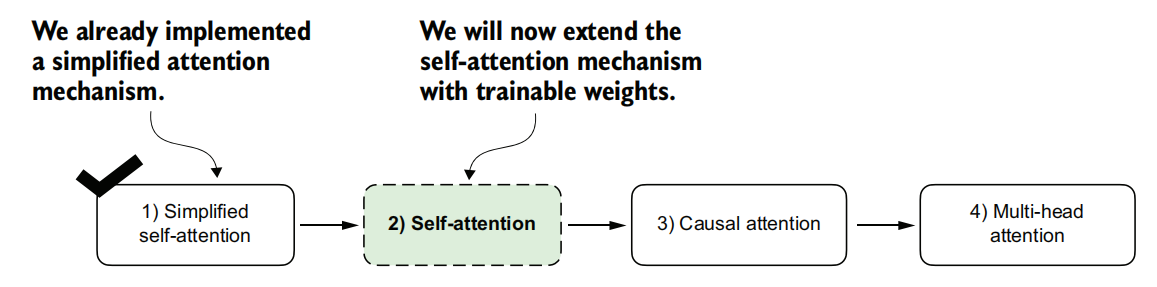

![alt text](image-3.png)

We will now intitiate random matrix for Q, K and V

In [14]:
# let
x_2 = inputs[1] 
d_in = inputs.shape[1] 
d_out = 2

In [15]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [16]:
query_2 = x_2 @ W_query 
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


### We require the key and value vectors for all input elements as they are involved in computing the attention weights with respect to the query q

In [17]:
keys = inputs @ W_key 
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


![alt text](image-4.png)

In [18]:
keys_2 = keys[1] 
attn_score_22 = query_2.dot(keys_2)  # example attn score
print(attn_score_22)

tensor(1.8524)


In [19]:
# In general
attn_scores_2 = query_2 @ keys.T 
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


![alt text](image-5.png)

In [20]:
# Scaled dot-product
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


## Scaled-Dot Product
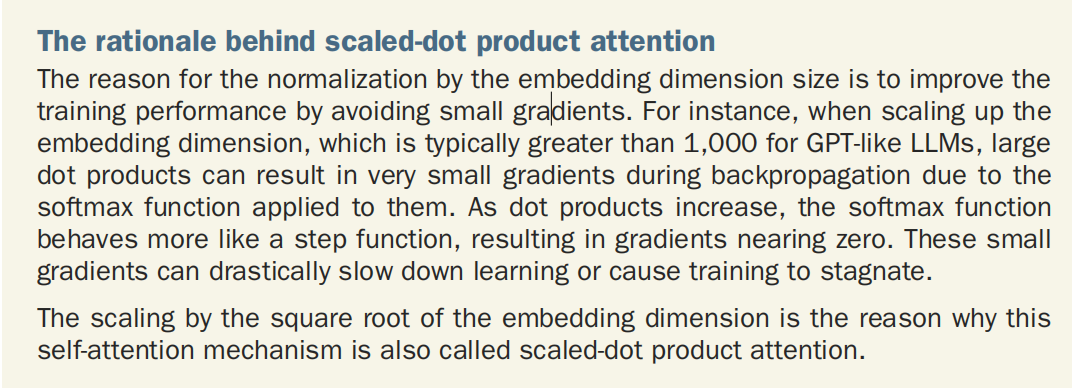

### Final context vector
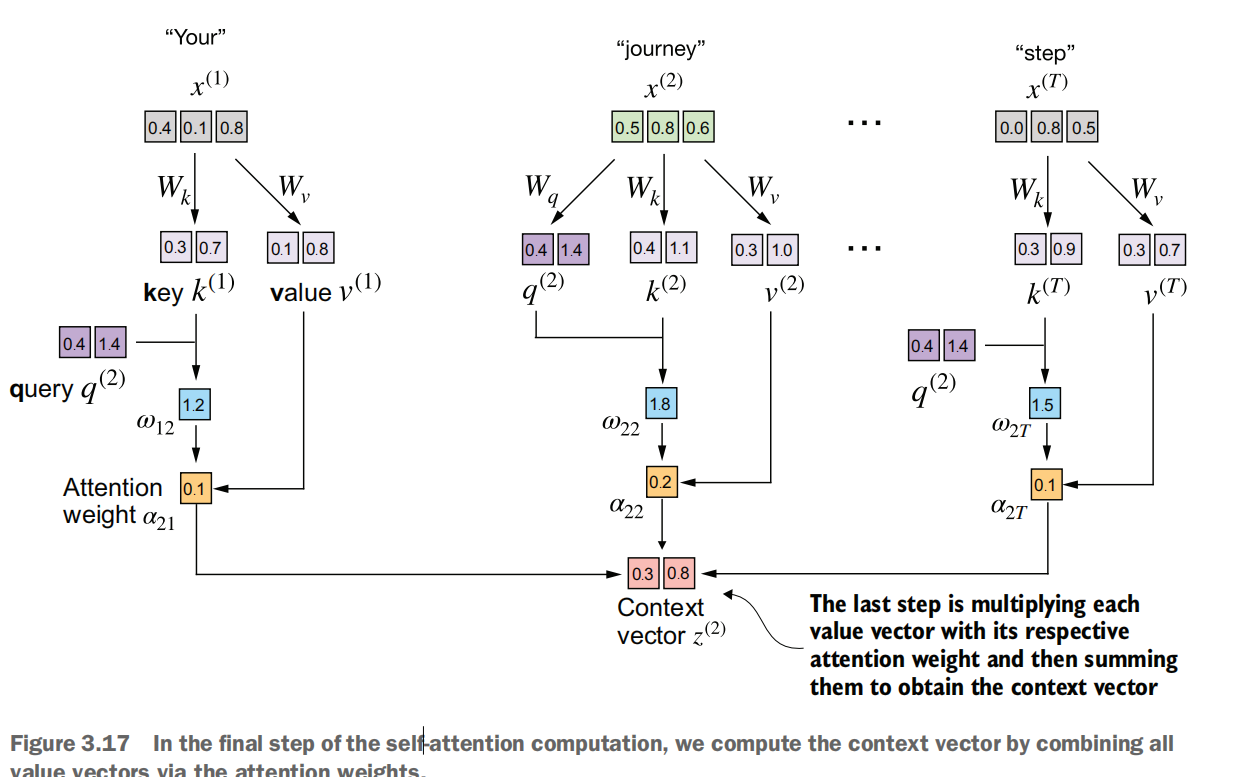

In [21]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


## Why query, key, and value?
The terms “key,” “query,” and “value” in the context of attention mechanisms are
borrowed from the domain of information retrieval and databases, where similar concepts are used to store, search, and retrieve information.


A query is analogous to a search query in a database. It represents the current item
(e.g., a word or token in a sentence) the model focuses on or tries to understand.


The query is used to probe the other parts of the input sequence to determine how
much attention to pay to them.\
The key is like a database key used for indexing and searching. In the attention mechanism, each item in the input sequence (e.g., each word in a sentence) has an associated key. These keys are used to match the query.


The value in this context is similar to the value in a key-value pair in a database. It
represents the actual content or representation of the input items. Once the model
determines which keys (and thus which parts of the input) are most relevant to the
query (the current focus item), it retrieves the corresponding values.

# Implementing a compact self-attention Python class

In [22]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    
 def __init__(self, d_in, d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in, d_out))
    self.W_key = nn.Parameter(torch.rand(d_in, d_out))
    self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    
 def forward(self, x):
    keys = x @ self.W_key
    queries = x @ self.W_query
    values = x @ self.W_value
    
    attn_scores = queries @ keys.T # omega
    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
    context_vec = attn_weights @ values
    return context_vec

In [23]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


### We are using nn.Linear layer as it has better weight init algo and it is more optimized for backprop algo


In [24]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values
        return context_vec

Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because\
they use different initial weights for the weight matrices since nn.Linear uses a more\
sophisticated weight initialization scheme.

In [25]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


#### The parameters are different for the two methods

In [26]:
sa_v1.W_key , sa_v1.W_query, sa_v1.W_value

(Parameter containing:
 tensor([[0.1366, 0.1025],
         [0.1841, 0.7264],
         [0.3153, 0.6871]], requires_grad=True),
 Parameter containing:
 tensor([[0.2961, 0.5166],
         [0.2517, 0.6886],
         [0.0740, 0.8665]], requires_grad=True),
 Parameter containing:
 tensor([[0.0756, 0.1966],
         [0.3164, 0.4017],
         [0.1186, 0.8274]], requires_grad=True))

In [27]:
sa_v2.W_key.weight, sa_v2.W_query.weight, sa_v2.W_value.weight

(Parameter containing:
 tensor([[ 0.4058, -0.4704,  0.2368],
         [ 0.2134, -0.2601, -0.5105]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3161,  0.4568,  0.5118],
         [-0.1683, -0.3379, -0.0918]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2526, -0.1415, -0.1962],
         [ 0.5191, -0.0852, -0.2043]], requires_grad=True))

# Masked Self-attention (Casual Attention)

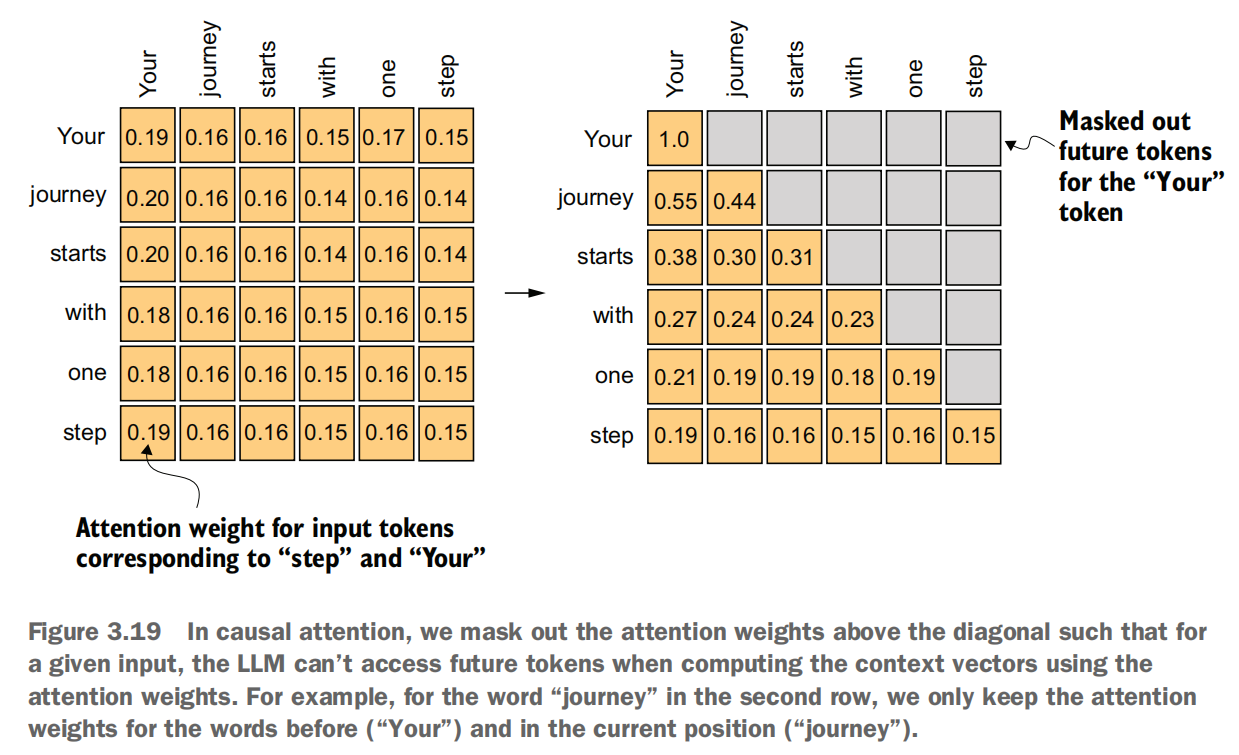

### One way of masking

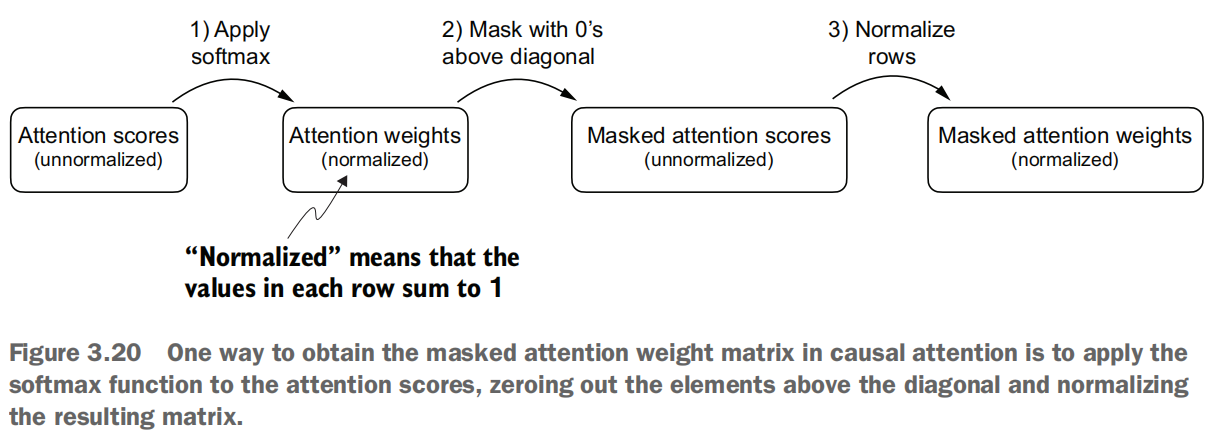

In [28]:
queries = sa_v2.W_query(inputs) 
keys = sa_v2.W_key(inputs) 
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [29]:
## We can implement the second step using PyTorch’s tril function to create a mask where the values above the diagonal are zero:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [30]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [31]:
# Re-normalising 
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


# Information Leakage
When we apply a mask and then renormalize the attention weights, it might initially
appear that information from future tokens (which we intend to mask) could still influence the current token because their values are part of the softmax calculation. 


However, the key insight is that when we renormalize the attention weights after masking,\
what we’re essentially doing is recalculating the softmax over a smaller subset (since
masked positions don’t contribute to the softmax value).\
The mathematical elegance of softmax is that despite initially including all positions
in the denominator, after masking and renormalizing, the effect of the masked positions is nullified—they don’t contribute to the softmax score in any meaningful way.


In simpler terms, after masking and renormalization, the distribution of attention
weights is as if it was calculated only among the unmasked positions to begin with.\
This ensures there’s no information leakage from future (or otherwise masked)
tokens as we intended.

### Masking with -inf
![alt text](image-6.png)

In [32]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [33]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


## Dropouts

In [34]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) 
example = torch.ones(6, 6) 
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


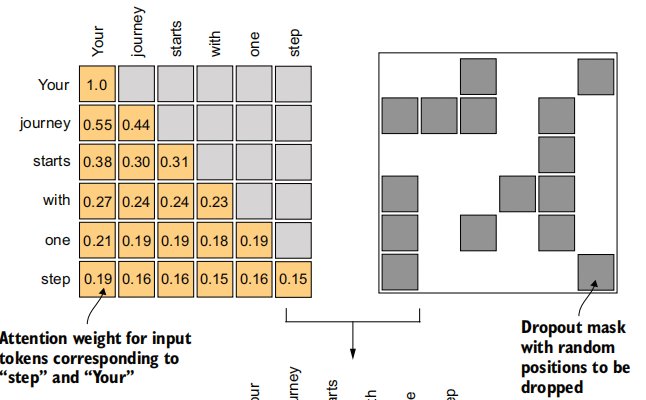

In [35]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


## Implimenting a compact casual attention class

In [36]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [37]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [38]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length,dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) 
        self.register_buffer('mask',torch.triu(torch.ones(context_length, context_length), diagonal=1))
                        
    def forward(self, x):
        b, num_tokens, d_in = x.shape 
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(1, 2) 
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) 
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec

In [39]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, 2, context_length, 0.0)
context_vecs = ca(batch)
print("Embedding_vecs (Input):\n", batch)
print("context_vecs (Output):\n", context_vecs)

Embedding_vecs (Input):
 tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])
context_vecs (Output):
 tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


# Multi-Head Attention

### 1. Stacking multiple single-head attention layers

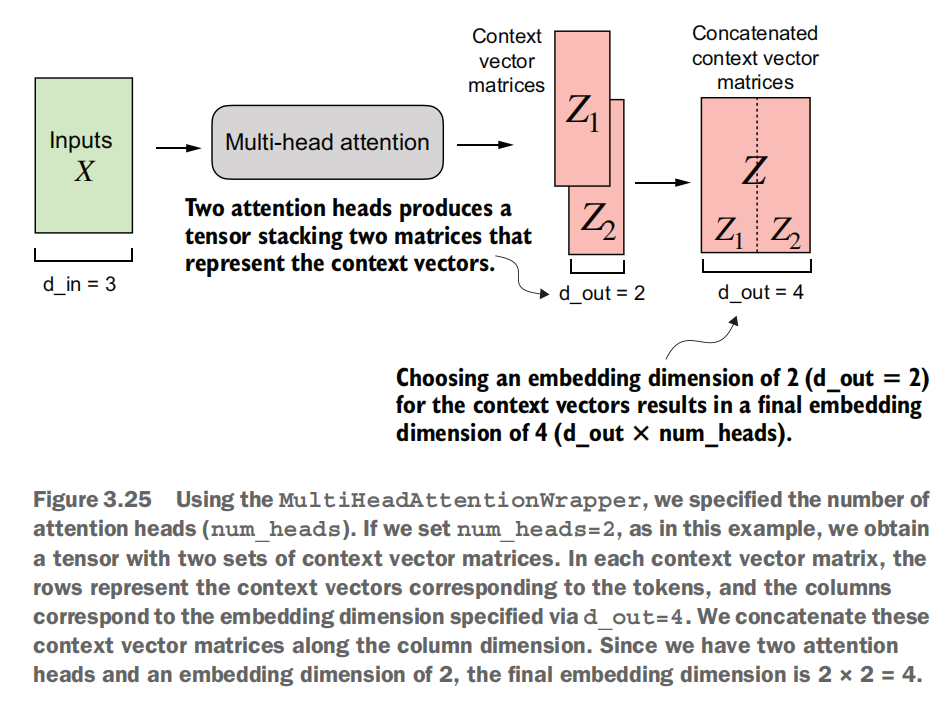

In [40]:
# A wrapper class to implement multi-head attention
# class that stacks multiple instances of our previously implemented CausalAttention module.
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList([CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)])
        
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [41]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2

mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)

context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


## 2. Implementing multi-head attention with weight splits

In the MultiHeadAttentionWrapper class with two attention heads, 
we initialized two weight matrices, Wq1 and Wq2, and computed two query matrices, Q1 and Q2 (top).\
In the MultiheadAttention class, we initialize one larger weight matrix \
Wq, only perform one matrix multiplication with the inputs to obtain a query matrix Q, and\ 
then split the query matrix into Q1 and Q2 (bottom). We do the same for the keys and \
values.

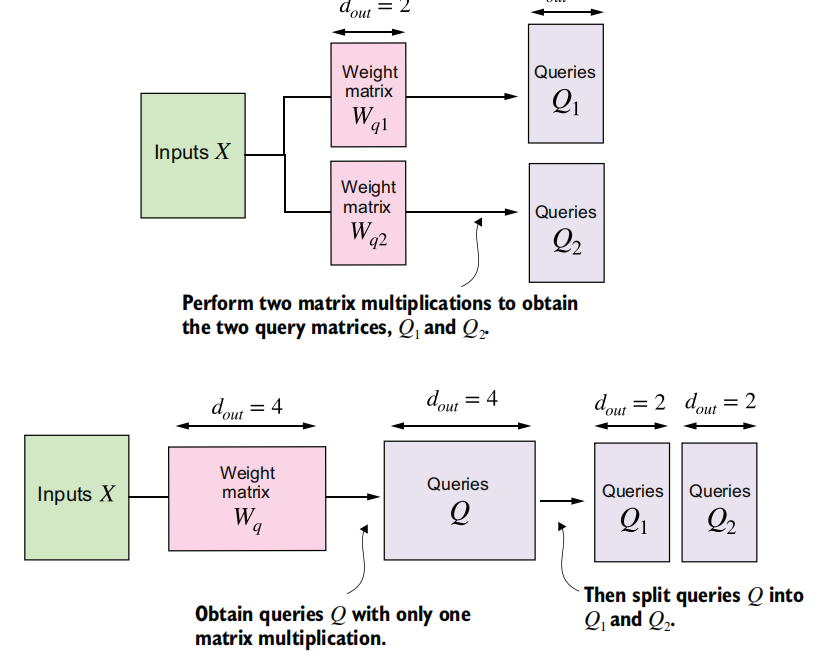

In [42]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573], 
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],
                   
                    [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [43]:
print(a @ a.transpose(2, 3))


## this is equivalent to :

# first_head = a[0, 0, :, :]
# first_res = first_head @ first_head.T
# print("First head:\n", first_res)
# second_head = a[0, 1, :, :]
# second_res = second_head @ second_head.T
# print("\nSecond head:\n", second_res)

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


## Final Multi-Head Attention

In [47]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
        "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads 
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out) 
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
                            "mask",
                            torch.triu(torch.ones(context_length, context_length),
                            diagonal=1)
                            )
        
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x) 
        queries = self.W_query(x) 
        values = self.W_value(x)
        
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim) 
        queries = queries.view( 
                    b, num_tokens, self.num_heads, self.head_dim 
                        ) 
        keys = keys.transpose(1, 2) 
        queries = queries.transpose(1, 2) 
        values = values.transpose(1, 2) 
        
        attn_scores = queries @ keys.transpose(2, 3) 
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens] 
        attn_scores.masked_fill_(mask_bool, -torch.inf) 
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        context_vec = context_vec.contiguous().view(
                    b, num_tokens, self.d_out
                )
        context_vec = self.out_proj(context_vec) 
        return context_vec

In [51]:
batch, batch.shape

(tensor([[[0.4300, 0.1500, 0.8900],
          [0.5500, 0.8700, 0.6600],
          [0.5700, 0.8500, 0.6400],
          [0.2200, 0.5800, 0.3300],
          [0.7700, 0.2500, 0.1000],
          [0.0500, 0.8000, 0.5500]],
 
         [[0.4300, 0.1500, 0.8900],
          [0.5500, 0.8700, 0.6600],
          [0.5700, 0.8500, 0.6400],
          [0.2200, 0.5800, 0.3300],
          [0.7700, 0.2500, 0.1000],
          [0.0500, 0.8000, 0.5500]]]),
 torch.Size([2, 6, 3]))

In [54]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 10
mha = MultiHeadAttention(d_in, d_out, context_length, 0.2, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.2605, -0.5421, -0.1075,  0.1712, -0.2528,  0.0269,  0.3943,
          -0.1359,  0.2453, -0.5368],
         [-0.2181, -0.4303,  0.0052, -0.0763, -0.3763,  0.0754,  0.3300,
          -0.1137,  0.4089, -0.3615],
         [-0.2215, -0.4101,  0.0431, -0.0633, -0.4068,  0.0517,  0.3724,
          -0.0966,  0.3514, -0.4789],
         [-0.2426, -0.3888,  0.0615,  0.1114, -0.3390, -0.0434,  0.3090,
          -0.1237,  0.2502, -0.3825],
         [-0.2445, -0.3487,  0.1146, -0.0749, -0.4137,  0.0290,  0.3099,
          -0.1362,  0.4044, -0.3092],
         [-0.2370, -0.3644,  0.0993, -0.0058, -0.4034, -0.0015,  0.3402,
          -0.1120,  0.3122, -0.4254]],

        [[-0.2605, -0.5421, -0.1075,  0.1712, -0.2528,  0.0269,  0.3943,
          -0.1359,  0.2453, -0.5368],
         [-0.2181, -0.4303,  0.0052, -0.0763, -0.3763,  0.0754,  0.3300,
          -0.1137,  0.4089, -0.3615],
         [-0.2843, -0.3637,  0.1136,  0.1401, -0.3589, -0.0430,  0.3535,
          -0.1557,  0.1990, -0.5433],

In [71]:
block_size = 1024
d_in, d_out = 768, 768
num_heads = 12
MultiHeadAttention(d_in, d_out, block_size, 0.0, num_heads)

MultiHeadAttention(
  (W_query): Linear(in_features=768, out_features=768, bias=False)
  (W_key): Linear(in_features=768, out_features=768, bias=False)
  (W_value): Linear(in_features=768, out_features=768, bias=False)
  (out_proj): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

# End of Notebook
